# Two Dimensional Gaussians

Gaussians plotted in 3D!

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib import cm
from math import exp
import time

Function for creating a single 2D surface.

In [2]:
def two_d_gaussian(points = 100,
    min_x = -4.,
    min_y = -4.,
    max_x = 4.,
    max_y = 4.,
    x0 = 0.,
    y0 = 0.,
    var_x = 1.,
    var_y = 1.
):
    xs = np.linspace(min_x, max_x, points)
    ys = np.linspace(min_y, max_y, points)
    zs = np.zeros((points, points), np.float64)

    for ix, x in enumerate(xs):
        for iy, y in enumerate(ys):
            zs[ix, iy] = exp(-((x-x0)**2/2/var_x + (y-y0)**2/2/var_y))

    return xs, ys, zs

Plot the single surface

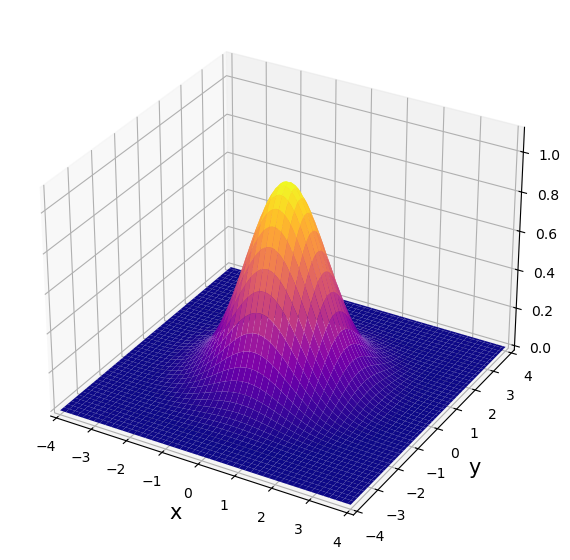

In [3]:
xs, ys, zs = two_d_gaussian()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), subplot_kw={"projection": "3d"})
xs, ys = np.meshgrid(xs, ys)
axs.set_xlabel("x", size=15)
axs.set_ylabel("y", size=15)
axs.set_zlabel("z", size=15)
axs.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[0, 1.1])
axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)

Prepare the lists of properties for calls to the `two_d_gaussian()` function.

In [4]:
ms_per_frame = 33
frames = 300

x0_steps = np.concatenate([np.linspace(-4, 0, frames // 3), np.zeros(frames // 3), np.linspace(0, 4, frames // 3)])
y0_steps = np.concatenate([np.linspace(-4, 0, frames // 3), np.zeros(frames // 3), np.linspace(0, 4, frames // 3)])

And animate it!

Rendered frame 0 in 91 ms
Rendered frame 1 in 74 ms
Rendered frame 2 in 69 ms
Rendered frame 3 in 66 ms
Rendered frame 4 in 65 ms
Rendered frame 5 in 73 ms
Rendered frame 6 in 71 ms
Rendered frame 7 in 67 ms
Rendered frame 8 in 67 ms
Rendered frame 9 in 72 ms
Rendered frame 10 in 68 ms
Rendered frame 11 in 84 ms
Rendered frame 12 in 73 ms
Rendered frame 13 in 71 ms
Rendered frame 14 in 73 ms
Rendered frame 15 in 82 ms
Rendered frame 16 in 67 ms
Rendered frame 17 in 72 ms
Rendered frame 18 in 70 ms
Rendered frame 19 in 65 ms
Rendered frame 20 in 72 ms
Rendered frame 21 in 67 ms
Rendered frame 22 in 77 ms
Rendered frame 23 in 82 ms
Rendered frame 24 in 76 ms
Rendered frame 25 in 71 ms
Rendered frame 26 in 71 ms
Rendered frame 27 in 70 ms
Rendered frame 28 in 72 ms
Rendered frame 29 in 68 ms


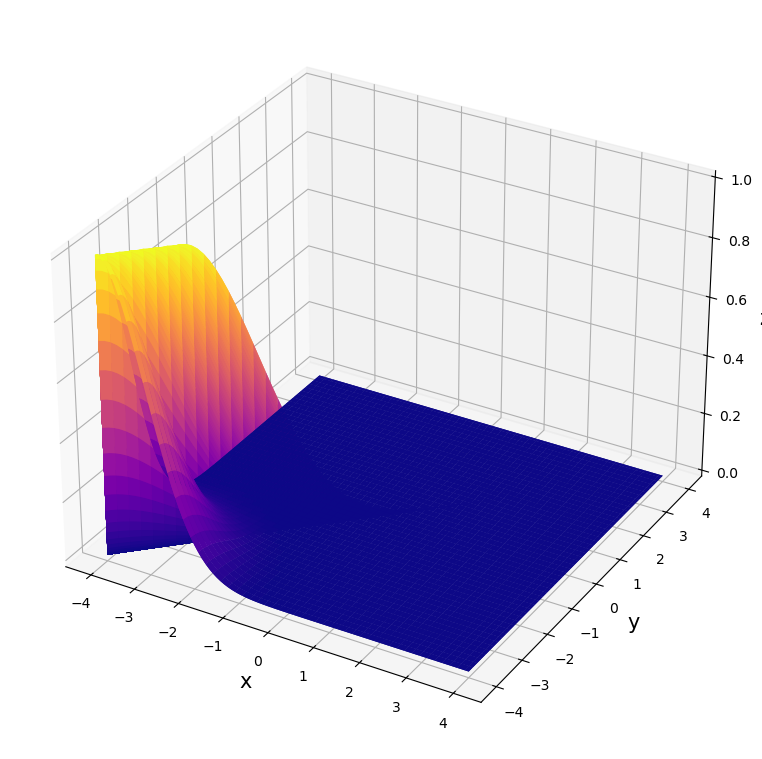

In [6]:
dpi = 100
width = 1080 / dpi
height = 1920 / 2 / dpi
seconds = 10
frame_rate_ms = 33
bgcolor = "#1E1E1E"
line_color = "#73FBD3"
axis_color = "#01BAEF"
annotation_color = "#FFFFFF"
# heading_text_color = "#FC7753"

# xs, ys, zs = two_d_gaussian(x0=x0_steps[299], y0=y0_steps[299])
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(width, height), dpi=dpi, subplot_kw={"projection": "3d"})
# xs, ys = np.meshgrid(xs, ys)
# axs.set_xlabel("x", size=15)
# axs.set_ylabel("y", size=15)
# axs.set_zlabel("z", size=15)
# sfc = axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)

def init_func():
    xs, ys, zs = two_d_gaussian(x0=x0_steps[0], y0=y0_steps[0])
    xs, ys = np.meshgrid(xs, ys)
    axs.set_xlabel("x", size=15)
    axs.set_ylabel("y", size=15)
    axs.set_zlabel("z", size=15)
    sfc = axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)
    return sfc,

def update(frame):
    start_time = int(time.time() * 1000)
    xs, ys, zs = two_d_gaussian(x0=x0_steps[frame], y0=y0_steps[frame])
    sfc = axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)
    end_time = int(time.time() * 1000)
    print(f"Rendered frame {frame} in {end_time-start_time} ms")
    return sfc,

ani = animation.FuncAnimation(fig=fig, func=update, init_func=init_func, frames=30, interval=ms_per_frame)
ani.save(filename=os.path.join("output", "single_2d_gaussian.mp4"), writer="ffmpeg")